In [152]:
import pandas as pd
import numpy as np
from numpy import inf
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
import matplotlib as mpl
import matplotlib.pyplot as plt

In [153]:
data = pd.read_csv('MasterData.csv', sep=';')
data

,CAP,Neighborhood,Price,NTN,IMI,GdA,Trend Eval,Perception
0,37121,Centro,3700.0,0.041,0.0210,0.07,0.332,5
1,37122,Cittadella,2800.0,0.177,0.0247,0.07,0.281,5
2,37123,San Zeno,2500.0,0.177,0.0247,0.07,0.115,4
3,37124,Parona Pindemonte,2200.0,0.061,0.0248,0.07,0.025,3
4,37125,Quinzano,2000.0,0.115,0.0205,0.07,-0.031,3
5,37126,Borgo Treno,2600.0,-0.021,0.0248,0.07,0.045,4
6,37127,Avesa,1800.0,0.115,0.0205,0.07,-0.276,3
7,37128,Valdonega,2900.0,-0.032,0.0248,0.07,0.021,4
8,37129,Veronetta Ponte Pietra,2500.0,-0.239,0.0227,0.07,0.185,4
9,37131,Borgo Venezia Santa Croce,2000.0,-0.061,0.0246,0.07,0.142,3


In [163]:
data.sort_values(by='Price', ascending=False)

,CAP,Neighborhood,Price,NTN,IMI,GdA,Trend Eval,Perception,Price_binned,Perception_binned,Trend_binned
0,37121,Centro,0.388721,0.041,0.0210,0.07,0.332,5,5,Very High,5
7,37128,Valdonega,0.304673,-0.032,0.0248,0.07,0.021,4,4,High,3
1,37122,Cittadella,0.294167,0.177,0.0247,0.07,0.281,5,4,Very High,5
5,37126,Borgo Treno,0.273155,-0.021,0.0248,0.07,0.045,4,3,High,3
2,37123,San Zeno,0.262649,0.177,0.0247,0.07,0.115,4,3,High,4
8,37129,Veronetta Ponte Pietra,0.262649,-0.239,0.0227,0.07,0.185,4,3,High,4
3,37124,Parona Pindemonte,0.231131,0.061,0.0248,0.07,0.025,3,2,Medium,3
4,37125,Quinzano,0.210119,0.115,0.0205,0.07,-0.031,3,2,Medium,3
9,37131,Borgo Venezia Santa Croce,0.210119,-0.061,0.0246,0.07,0.142,3,2,Medium,4
16,37138,Borgo Milano Borgo Nuovo,0.189107,0.106,0.0260,0.07,0.095,2,2,Low,4


In [164]:
price_array = np.array(data['Price'])
normalized_Price = preprocessing.normalize([price_array])

In [165]:
print(normalized_Price)


[[0.38872066 0.29416699 0.2626491  0.2311312  0.21011928 0.27315506
  0.18910735 0.30467295 0.2626491  0.21011928 0.15758946 0.17860139
  0.16809542 0.14708349 0.13657753 0.13657753 0.18910735 0.16809542
  0.18910735 0.18910735]]


In [166]:
Price_n = pd.DataFrame(normalized_Price)
Price_n = Price_n.transpose()
Price_n.columns = ["Price"]
Price_n

,Price
0,0.388721
1,0.294167
2,0.262649
3,0.231131
4,0.210119
5,0.273155
6,0.189107
7,0.304673
8,0.262649
9,0.210119


In [167]:
data.update(Price_n)
data

,CAP,Neighborhood,Price,NTN,IMI,GdA,Trend Eval,Perception,Price_binned,Perception_binned,Trend_binned
0,37121,Centro,0.388721,0.041,0.0210,0.07,0.332,5,5,Very High,5
1,37122,Cittadella,0.294167,0.177,0.0247,0.07,0.281,5,4,Very High,5
2,37123,San Zeno,0.262649,0.177,0.0247,0.07,0.115,4,3,High,4
3,37124,Parona Pindemonte,0.231131,0.061,0.0248,0.07,0.025,3,2,Medium,3
4,37125,Quinzano,0.210119,0.115,0.0205,0.07,-0.031,3,2,Medium,3
5,37126,Borgo Treno,0.273155,-0.021,0.0248,0.07,0.045,4,3,High,3
6,37127,Avesa,0.189107,0.115,0.0205,0.07,-0.276,3,2,Medium,1
7,37128,Valdonega,0.304673,-0.032,0.0248,0.07,0.021,4,4,High,3
8,37129,Veronetta Ponte Pietra,0.262649,-0.239,0.0227,0.07,0.185,4,3,High,4
9,37131,Borgo Venezia Santa Croce,0.210119,-0.061,0.0246,0.07,0.142,3,2,Medium,4


In [168]:
bins= np.linspace(min(data['Price']),max(data['Price']), 6)
group_names= ['1', '2', '3', '4', '5']

data['Price_binned']=pd.cut(data['Price'], bins, labels=group_names, include_lowest=True)

In [169]:
#bins= np.linspace(min(data['Perception']),max(data['Perception']), 6)
#group_names= ['Very Low', 'Low', 'Medium', 'High', 'Very High']

#data['Perception_binned']=pd.cut(data['Perception'], bins, labels=group_names, include_lowest=True)

In [170]:
bins= np.linspace(min(data['Trend Eval']),max(data['Trend Eval']), 6)
group_names= ['1', '2', '3', '4', '5']

data['Trend_binned']=pd.cut(data['Trend Eval'], bins, labels=group_names, include_lowest=True)

In [171]:
data

,CAP,Neighborhood,Price,NTN,IMI,GdA,Trend Eval,Perception,Price_binned,Perception_binned,Trend_binned
0,37121,Centro,0.388721,0.041,0.0210,0.07,0.332,5,5,Very High,5
1,37122,Cittadella,0.294167,0.177,0.0247,0.07,0.281,5,4,Very High,5
2,37123,San Zeno,0.262649,0.177,0.0247,0.07,0.115,4,3,High,4
3,37124,Parona Pindemonte,0.231131,0.061,0.0248,0.07,0.025,3,2,Medium,3
4,37125,Quinzano,0.210119,0.115,0.0205,0.07,-0.031,3,2,Medium,3
5,37126,Borgo Treno,0.273155,-0.021,0.0248,0.07,0.045,4,3,High,3
6,37127,Avesa,0.189107,0.115,0.0205,0.07,-0.276,3,2,Medium,1
7,37128,Valdonega,0.304673,-0.032,0.0248,0.07,0.021,4,4,High,3
8,37129,Veronetta Ponte Pietra,0.262649,-0.239,0.0227,0.07,0.185,4,3,High,4
9,37131,Borgo Venezia Santa Croce,0.210119,-0.061,0.0246,0.07,0.142,3,2,Medium,4


In [172]:
data['Price_binned']=data['Price_binned'].astype(int)

In [173]:
data['Perception']=data['Perception'].astype(int)

In [174]:
data['Trend_binned']=data['Trend_binned'].astype(int)

In [175]:

data['Index_sell'] = (data['Trend_binned'] / data['Perception']) 

In [176]:
data

,CAP,Neighborhood,Price,NTN,IMI,GdA,Trend Eval,Perception,Price_binned,Perception_binned,Trend_binned,Index_sell
0,37121,Centro,0.388721,0.041,0.0210,0.07,0.332,5,5,Very High,5,1.000000
1,37122,Cittadella,0.294167,0.177,0.0247,0.07,0.281,5,4,Very High,5,1.000000
2,37123,San Zeno,0.262649,0.177,0.0247,0.07,0.115,4,3,High,4,1.000000
3,37124,Parona Pindemonte,0.231131,0.061,0.0248,0.07,0.025,3,2,Medium,3,1.000000
4,37125,Quinzano,0.210119,0.115,0.0205,0.07,-0.031,3,2,Medium,3,1.000000
5,37126,Borgo Treno,0.273155,-0.021,0.0248,0.07,0.045,4,3,High,3,0.750000
6,37127,Avesa,0.189107,0.115,0.0205,0.07,-0.276,3,2,Medium,1,0.333333
7,37128,Valdonega,0.304673,-0.032,0.0248,0.07,0.021,4,4,High,3,0.750000
8,37129,Veronetta Ponte Pietra,0.262649,-0.239,0.0227,0.07,0.185,4,3,High,4,1.000000
9,37131,Borgo Venezia Santa Croce,0.210119,-0.061,0.0246,0.07,0.142,3,2,Medium,4,1.333333


In [178]:
data['Index_sell'] = data['Index_sell'].replace(np.inf, 0)
data['Index_sell']

0     1.000000
1     1.000000
2     1.000000
3     1.000000
4     1.000000
5     0.750000
6     0.333333
7     0.750000
8     1.000000
9     1.333333
10    1.500000
11    1.500000
12    3.000000
13    2.000000
14    2.000000
15    1.500000
16    2.000000
17    1.333333
18    0.666667
19    0.666667
Name: Index_sell, dtype: float64

In [179]:
data.sort_values(by='Index_sell', ascending=False)

,CAP,Neighborhood,Price,NTN,IMI,GdA,Trend Eval,Perception,Price_binned,Perception_binned,Trend_binned,Index_sell
12,37134,Borgo Roma,0.168095,0.115,0.0248,0.07,-0.005,1,1,Very Low,3,3.000000
16,37138,Borgo Milano Borgo Nuovo,0.189107,0.106,0.0260,0.07,0.095,2,2,Low,4,2.000000
14,37136,Golosine,0.136578,0.120,0.0251,0.07,-0.085,1,1,Very Low,2,2.000000
13,37135,Fiera ZAI,0.147083,0.243,0.0292,0.07,-0.085,1,1,Very Low,2,2.000000
10,37132,San Michele,0.157589,0.065,0.0227,0.07,-0.007,2,1,Low,3,1.500000
15,37137,Santa Lucia,0.136578,0.112,0.0251,0.07,-0.005,2,1,Low,3,1.500000
11,37133,Porto San Pancrazio,0.178601,0.083,0.0227,0.07,0.085,2,1,Low,3,1.500000
17,37139,Chievo San Massimo,0.168095,0.088,0.0220,0.07,0.095,3,1,Medium,4,1.333333
9,37131,Borgo Venezia Santa Croce,0.210119,-0.061,0.0246,0.07,0.142,3,2,Medium,4,1.333333
1,37122,Cittadella,0.294167,0.177,0.0247,0.07,0.281,5,4,Very High,5,1.000000


In [180]:
data.dtypes

CAP                     int64
Neighborhood           object
Price                 float64
NTN                   float64
IMI                   float64
GdA                   float64
Trend Eval            float64
Perception              int64
Price_binned            int64
Perception_binned    category
Trend_binned            int64
Index_sell            float64
dtype: object

In [181]:
data['CAP'] = data['CAP'].astype(str)
data

,CAP,Neighborhood,Price,NTN,IMI,GdA,Trend Eval,Perception,Price_binned,Perception_binned,Trend_binned,Index_sell
0,37121,Centro,0.388721,0.041,0.0210,0.07,0.332,5,5,Very High,5,1.000000
1,37122,Cittadella,0.294167,0.177,0.0247,0.07,0.281,5,4,Very High,5,1.000000
2,37123,San Zeno,0.262649,0.177,0.0247,0.07,0.115,4,3,High,4,1.000000
3,37124,Parona Pindemonte,0.231131,0.061,0.0248,0.07,0.025,3,2,Medium,3,1.000000
4,37125,Quinzano,0.210119,0.115,0.0205,0.07,-0.031,3,2,Medium,3,1.000000
5,37126,Borgo Treno,0.273155,-0.021,0.0248,0.07,0.045,4,3,High,3,0.750000
6,37127,Avesa,0.189107,0.115,0.0205,0.07,-0.276,3,2,Medium,1,0.333333
7,37128,Valdonega,0.304673,-0.032,0.0248,0.07,0.021,4,4,High,3,0.750000
8,37129,Veronetta Ponte Pietra,0.262649,-0.239,0.0227,0.07,0.185,4,3,High,4,1.000000
9,37131,Borgo Venezia Santa Croce,0.210119,-0.061,0.0246,0.07,0.142,3,2,Medium,4,1.333333


In [182]:
!conda install -n conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')


EnvironmentLocationNotFound: Not a conda environment: /home/jupyterlab/conda/envs/conda-forge

Folium installed and imported!


In [183]:
world_geo = r'convert.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[45.438158, 10.993742], zoom_start=13, tiles='openstreetmap')
world_map

In [184]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=data,
    columns=['CAP', 'Index_sell'],
    key_on='feature.properties.ID',
    fill_color= 'YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Index_sell'
)

folium.LayerControl().add_to(world_map)

# display map
world_map

In [185]:
data_cleancorr = data[['Price', 'NTN', 'IMI', 'GdA', 'Trend Eval', 'Perception', 'Index_sell']]
data_cleancorr.corr().round(3)

,Price,NTN,IMI,GdA,Trend Eval,Perception,Index_sell
Price,1.000,-0.293,-0.149,0.0,0.668,0.886,-0.477
NTN,-0.293,1.000,0.398,0.0,-0.200,-0.358,0.382
IMI,-0.149,0.398,1.000,0.0,0.080,-0.348,0.562
GdA,0.000,0.000,0.000,1.0,0.000,0.000,-0.000
Trend Eval,0.668,-0.200,0.080,0.0,1.000,0.595,0.012
Perception,0.886,-0.358,-0.348,0.0,0.595,1.000,-0.733
Index_sell,-0.477,0.382,0.562,-0.0,0.012,-0.733,1.000


In [190]:
pearson_coef, p_value = stats.pearsonr(data[('Trend Eval')], data[('Perception')])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is 0.5945266638648316  with a P-value of P =  0.005698811660341804


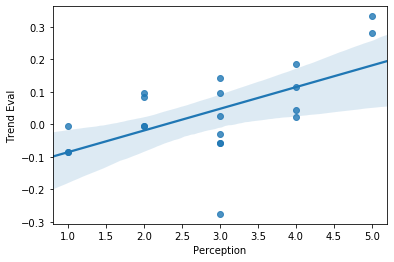

In [203]:
ax = sns.regplot(x='Perception', y='Trend Eval', data = data)


In [200]:
# ANOVA
f_val, p_val = stats.f_oneway(data[('Perception')], data[('Trend Eval')])
print( "ANOVA results: F=", f_val.round(3), ", P =", p_val)   

ANOVA results: F= 110.366 , P = 8.517501110019728e-13
